# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [4]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [6]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1) #визуализация в виде капель

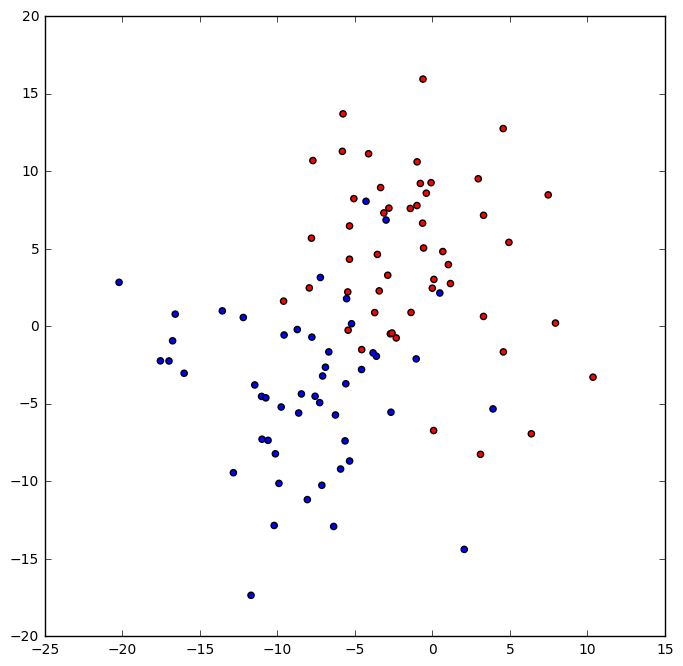

In [7]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [8]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [10]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1) #делаем объект with default parameters,но указывания random_state=1 чтобы сгенерированные данные сохранились

In [11]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels) #в кач-ве аргументов и меток класса-traina_data, train_labels сгенерированных ранее
#получим обученную модель. После этого будем строить предстказания используя test_data

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [12]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)#test_data- данные не участвовавшие в выборке. 
#С помощью них можем проверить насколько хорошо наша модель работает на внешних данных

In [10]:
print (test_labels) #тестовые метки

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [11]:
print (ridge_predictions) # визуально похожи на тестовые метки, но есть отличия

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [21]:
#оценка качества классификации формально с помощью простой метрики accuracy.Показывает долю правльных ответов на тестовой выборке
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [19]:
ridge_classifier.coef_ # веса

array([[-0.0854443 , -0.07273219]])

In [20]:
ridge_classifier.intercept_ #коэф перед свободным членом

array([-0.31250723])

#### LogisticRegression

In [22]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [23]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
lr_predictions = log_regressor.predict(test_data)

In [27]:
lr_proba_predictions = log_regressor.predict_proba(test_data) #дает также вероятности с которой объект принадлежит 1 или 2 классу

In [28]:
print (test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [29]:
print (lr_predictions)

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [31]:
print (lr_proba_predictions) #вероятности для каждого объекта принадлежности к 1 или 2 классу (в сумме ноль)

[[ 0.99873457  0.00126543]
 [ 0.38956803  0.61043197]
 [ 0.45000737  0.54999263]
 [ 0.00536816  0.99463184]
 [ 0.70965944  0.29034056]
 [ 0.23304944  0.76695056]
 [ 0.98983143  0.01016857]
 [ 0.9709671   0.0290329 ]
 [ 0.93909394  0.06090606]
 [ 0.15103335  0.84896665]
 [ 0.90324667  0.09675333]
 [ 0.0100448   0.9899552 ]
 [ 0.82338574  0.17661426]
 [ 0.05238427  0.94761573]
 [ 0.00443451  0.99556549]
 [ 0.00102911  0.99897089]
 [ 0.20817393  0.79182607]
 [ 0.91074564  0.08925436]
 [ 0.22580526  0.77419474]
 [ 0.00101709  0.99898291]
 [ 0.09600944  0.90399056]
 [ 0.99367624  0.00632376]
 [ 0.9779897   0.0220103 ]
 [ 0.29889823  0.70110177]
 [ 0.00210487  0.99789513]
 [ 0.00929423  0.99070577]
 [ 0.2670277   0.7329723 ]
 [ 0.85210662  0.14789338]
 [ 0.98871444  0.01128556]
 [ 0.00407572  0.99592428]]


In [34]:
print ( metrics.accuracy_score(test_labels, lr_predictions))

0.8


In [35]:
print (metrics.accuracy_score(test_labels, ridge_predictions))

0.866666666667


### Оценка качества по cross-validation

#### cross_val_score

In [ ]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [ ]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [ ]:
lr_scoring

In [ ]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

In [ ]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

#### cross_val_score с заданными scorer и cv_strategy

In [38]:
scorer = metrics.make_scorer(metrics.accuracy_score)
#В кач-ве метрики используем accuracy-долю правильных ответов. В качестве кросс-валидации используем k-fold на 10 fold-ов.
# Если мы указываем параметр cv=10, k-fold или stratified k-fold- by default, in binary stratified k-fold by default. 

In [39]:
cv_strategy = cross_validation.StratifiedShuffleSplit(blobs[1], n_iter = 20 , test_size = 0.3, random_state = 2)

In [40]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [41]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [46]:
ridge_scoring #cписок оценокметрики accuracy (у меня вывелось без округления)

array([ 0.86666667,  0.83333333,  0.93333333,  0.83333333,  0.86666667,
        0.76666667,  0.8       ,  0.9       ,  0.86666667,  1.        ,
        0.96666667,  0.86666667,  0.86666667,  0.86666667,  0.9       ,
        0.9       ,  0.8       ,  0.76666667,  0.93333333,  0.86666667])

In [47]:
lr_scoring  #для линейной регрессии

array([ 0.86666667,  0.86666667,  0.93333333,  0.83333333,  0.9       ,
        0.76666667,  0.8       ,  0.93333333,  0.8       ,  1.        ,
        0.96666667,  0.9       ,  0.9       ,  0.86666667,  0.9       ,
        0.9       ,  0.83333333,  0.76666667,  0.93333333,  0.86666667])

In [48]:
print ('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())) #посмотрим на статистики

Ridge mean:0.8700000000000001, max:1.0, min:0.7666666666666667, std:0.059535236998305825


In [44]:
print ('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8766666666666667, max:1.0, min:0.7666666666666667, std:0.06155395104206462


In [49]:
#на основании полученного результата видим, что модель работает приблизительно одинаково. Теперь усложним.

Предположим ,что мы хотим считать какую-то нестандартную метрику качества и хотим специфицировать нужную нам стратегию кросс-валидации. Для того чтобы передать свою метрику качества в эту функцию, нам нужно создать так называемый объект scorer. Он должен удовлетворять нужному интерфейсу. Он должен принимать 3 параметра. Первый — это модель, которую мы оцениваем. Далее — набор меток классов и набор наших предсказаний. Если мы посмотрим на синтаксис функции accuracy_score, то мы поймем, что он не такой. Эта метрика... эта функция не принимает на вход классификатор, она принимает только метки классов и наши предсказания. Для того чтобы создать правильный объект, который можно передать внутрь функции cross_val_score, нам с вами нужно его создать. Это можно делать с помощью функции make_scorer. Передаем ей в качестве аргумента нашу метрику и создаем scorer. Ну в данном случае мы передали ту же самую метрику, потому что она нам просто подходит.

In [50]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [ ]:
cv_strategy = cross_validation.StratifiedShuffleSplit(blobs[1], n_iter = 20 , test_size = 0.3, random_state = 2)